In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import random

'''
выборка ответов
30% - 1
--  - 0
1/2 prob pr

'''    

sz = 400

y = np.concatenate([np.ones(5 * sz // 10) , np.zeros(5 * sz // 10)])
score = np.concatenate([np.ones(sz // 4), np.zeros(sz // 4), np.zeros(sz // 4), np.ones(sz // 4)])


$$TPR = \frac{TP}{TP+FN}$$


$$FPR= \frac{FP}{FP+TN}$$

$$precision = \frac{TP}{TP+FP}$$


$$recall= \frac{TP}{TP+FN}$$

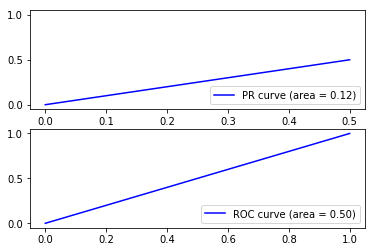

In [11]:
f = y
L = score
fpr, tpr, thresholds = metrics.roc_curve(L, f, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

precision, recall, _ = metrics.precision_recall_curve(L, f)
pr_auc = metrics.auc(recall, precision)
    
def calc_FP_TP_FN_TN(f, T):
    FP, TP, FN, TN = 0, 0, 0, 0
    for i in range(0, len(f)):
        if (f[i] > T):
            if (L[i]==1):
                TP += 1
            else:
                FP += 1
        else:
            if (L[i]==1):
                FN += 1
            else:
                TN += 1
    return FP, TP, FN, TN            

def calc_roc(f, thr, P, N):
    roc_x, roc_y = [], []
    for (_, T) in enumerate(thr):
        FP, TP, FN, TN = calc_FP_TP_FN_TN(f,T)        
        FPR = FP/float(N)
        TPR = TP/float(P)
        roc_x.append(FPR)
        roc_y.append(TPR)
        
    return roc_x, roc_y    
        
def calc_pr(f, thr, P, N):
    pr_x, pr_y = [0.0], [0.0]
    for (_, T) in enumerate(thr):
        FP, TP, FN, TN = calc_FP_TP_FN_TN(f,T) 
        TPR = TP/float(P)
        if ((TP + FP) > 0.0):
            pr = TP / float(TP + FP)
            re =  TPR # = TP/float(TP+FN) 
            pr_x.append(pr)
            pr_y.append(re)    
    return pr_x, pr_y  

min_f = min(f)
max_f = max(f)
thr = np.linspace(min_f, max_f, 50) #thresholds with step (max-min)/50
thr = thr[::-1]

P = sum(L)
N = len(L) - P

roc_x, roc_y = calc_roc(f, thr, P, N)
roc_x.append(1.0)
roc_y.append(1.0)
my_roc_auc =  np.trapz(roc_y, roc_x)

pr_x, pr_y = calc_pr(f, thr, P, N)
my_pr_auc = np.trapz(pr_x, pr_y)


#ROC
#f, axarr = plt.subplots(1, sharex=True)
#axarr.plot(roc_x, roc_y, color='blue', label='ROC curve (area = %0.2f)' % my_roc_auc)
#axarr.legend(loc="lower right")

#axarr[0].plot(fpr, tpr, color='darkorange', label='Sklearn ROC curve (area = %0.2f)' % roc_auc)
#axarr[0].legend(loc="lower right")


#PR
#f, axarr = plt.subplots(1, sharex=True)
recall[-1] = 0
precision[-1] = 0
#axarr.plot(pr_y, pr_x, color='blue', label='PR curve (area = %0.2f)' % my_pr_auc)
#axarr.legend(loc="lower right")
#axarr[0].plot(recall, precision, color='darkorange', label='Sklearn PR curve (area = %0.2f)' % pr_auc)
#axarr[0].legend(loc="lower right")


f, axarr = plt.subplots(2, sharey=True)
axarr[0].plot(pr_y, pr_x, color='blue', label='PR curve (area = %0.2f)' % my_pr_auc)
axarr[1].plot(roc_x, roc_y, color='blue', label='ROC curve (area = %0.2f)' % my_roc_auc)

axarr[0].legend(loc="lower right")
axarr[1].legend(loc="lower right")


plt.show()